# Création d'un nuage de mots à partir d'un texte
Il s'agit d'un tutoriel pas à pas pour apprendre à utiliser des bibliothèques de code externes, l'objectif final étant d'afficher les termes les plus récurrents d'un texte sous forme de nuage de mots.

## Première étape : importer un texte depuis une URL
Le texte sur lequel nous allons travailler est en ligne, il s'agit donc de le télécharger et de le stocker quelque part.

In [120]:
# import du module urllib
import urllib.request
# création d'une condition (pour gagner quelques lignes)
with urllib.request.urlopen('https://gutenberg.org/cache/epub/53595/pg53595.txt') as f:
    texte_brut = f.read().decode('utf-8')
# sélection des lignes qui nous intéressent (sans le paratexte)
texte_brut = texte_brut[1558:29565]
#print(texte_brut)

## Deuxième étape : nettoyer le texte
Il s'agit à la fois de tokeniser le texte, de le lemmatiser et de supprimer les _dead words_ comme les pronoms et certains mots de liaison, et ensuite de qualifier les mots pour nous arrêter que ce sur ce qui nous intéresse.

In [36]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [122]:
# import du module spaCy
import spacy
# téléchargement du modèle français pour lemmatizer le texte
!python -m spacy download fr_core_news_sm
# nous créons d'abord une variable pour appeler le modèle
nlp = spacy.load("fr_core_news_sm")
# on fait la préparation de la tokenisation
doc = nlp(texte_brut)
#print(doc)

  Using cached https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-3.8.0/fr_core_news_sm-3.8.0-py3-none-any.whl (16.3 MB)
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [137]:
# maintenant on peut faire la tokenisation
mots = []
for mot in doc:
    mots.append(mot.text)
#print(mots)

In [138]:
# on retire les éléments suspects du texte
garbage1 = "\r\n"
while garbage1 in mots:
    mots.remove(garbage1)
garbage2 = "\r\n\r\n"
while garbage2 in mots:
    mots.remove(garbage2)
# on transforme la liste en string pour faciliter les prochaines manipulations
mots = ' '.join(mots)
#print(mots)

In [106]:
# on retire les éléments de ponctuation
# pour cela on importe d'abord un module
import string
mots = mots.translate(str.maketrans("", "", string.punctuation))
#print(mots)

In [107]:
# maintenant la lemmatization
lemmatization = nlp(mots)
texte_lemmatise = [mot.lemma_ for mot in lemmatization]
#print(texte_lemmatise)

In [130]:
# et enfin supprimer les stopwords, ces mots que nous ne souhaitons
# pas intégrer dans notre analyse
# import de la liste des stopwords
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
texte = []
for lemm in texte_lemmatise:
    if lemm not in fr_stop:
        texte.append(lemm)
#print(texte)
# on transforme à nouveau la liste en string pour faciliter la suite
texte = ' '.join(texte)
# il reste à nettoyer encore le texte de certains pronoms
texte = texte.replace(" l ", " ")
texte = texte.replace(" n ", " ")
texte = texte.replace(" m ", " ")
texte = texte.replace(" s ", " ")
texte = texte.replace(" j ", " ")
texte = texte.replace(" t ", " ")
texte = texte.replace(" d ", " ")
texte = texte.replace("   ", " ")
#print(texte)

## Troisième étape : création du nuage de mots
Maintenant que nous disposons de données nettoyées, nous pouvons générer un nuage de mots.

In [41]:
pip install wordcloud #installation de WordCloud qui n'est pas un module disponible dans les dépôts

  Using cached wordcloud-1.9.4-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (537 kB)
Note: you may need to restart the kernel to use updated packages.


In [99]:
# import des modules nécessaires au nuage de mots
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# et le module pour dessiner le nuage
import matplotlib.pyplot as plt

In [131]:
# on génère un nuage de mots (mais sans l'afficher
nuage = WordCloud().generate(texte)

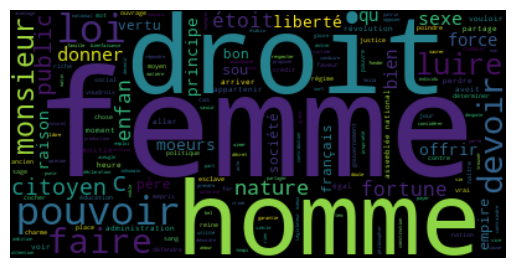

In [133]:
# on afficher l'image de ces mots
plt.imshow(nuage, interpolation='bilinear')
plt.axis("off")
plt.show()

## 